## velocity analysis for myeloid cells

**Author:Dr.Xi Li**

**Created: 07/28/2021**

**Language: Python**



In [12]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scvelo as scv
import loompy
import pandas as pd
import numpy as np
import os
import scanpy as sc
import scipy.stats as stats
from io import StringIO
from sklearn import linear_model
from sklearn.svm import SVR
import seaborn as sns
import scanpy.external as sce
%matplotlib inline

In [13]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')
# for beautified visualization


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## input sample path

First lets find the directory that we are working in

**Note:  SigsDir must be changed depending on the user to allow for proper use of this script**

In [14]:
os.getcwd()

'/mnt/c9b6130c-37e5-4f62-becc-dd4240b42021/T127_T22_ola_2'

In [15]:
#set directory to where signature gene lists locates
SigsDir="/mnt/533ee9c3-18c0-4c72-a09e-d9ce5a10ef9e/sig"
AnnoRefDir="/mnt/533ee9c3-18c0-4c72-a09e-d9ce5a10ef9e/T_anno_ref"

## Unique Gene Names

First we want to select the genes that we wish to look at and format them into a data frame that we can use later on

In [16]:
#set the directory for outputs
project_ID="pool_M1_M2_MKI67"
scv.settings.figdir=f'{project_ID}_figures'

In [925]:
adata=scv.read (f"{project_ID}_figures/{project_ID}_anno_dy.h5ad")

In [379]:
raw=pd.DataFrame(data=adata.raw.X.copy(), index=adata.obs_names, columns=adata.raw.var_names)

In [381]:
adata_raw= sc.AnnData(raw)
for i in np.unique(adata.obs.columns):
    adata_raw.obs[i]=adata.obs[i]

In [382]:
scv.pp.filter_and_normalize(adata_raw,flavor="seurat")
sc.pp.log1p(adata_raw)

Logarithmized X.


In [373]:
adata.raw=adata_raw

In [ ]:
#store a h5ad file for further faster loadinig
adata.var_names_make_unique("_")

#we need to make a directory to store the files in
try:
    directoryName=project_ID+"_figures"
    os.mkdir(directoryName)
except:
    pass

#we need to make a directory to store the files in
#we need to make a directory to store the files in
try:
    directoryName=project_ID+"_DEG"
    os.mkdir(directoryName)
except:
    pass


In [ ]:
import densmap

In [ ]:
#This section can create a densmap if disired 
embedding, ro, re = densmap.densMAP(n_neighbors=150, n_epochs=500, dens_frac=0.3,
                                    min_dist=0.2,spread=2,
                                    dens_lambda=0.7).fit_transform(adata.to_df(layer="Ms"))
    
#input densmap information into adata
adata.obsm["X_densmap"]=embedding

saving figure to file pool_M1_M2_MKI67_figures/scvelo_treatment_anno_sub_densmap.pdf


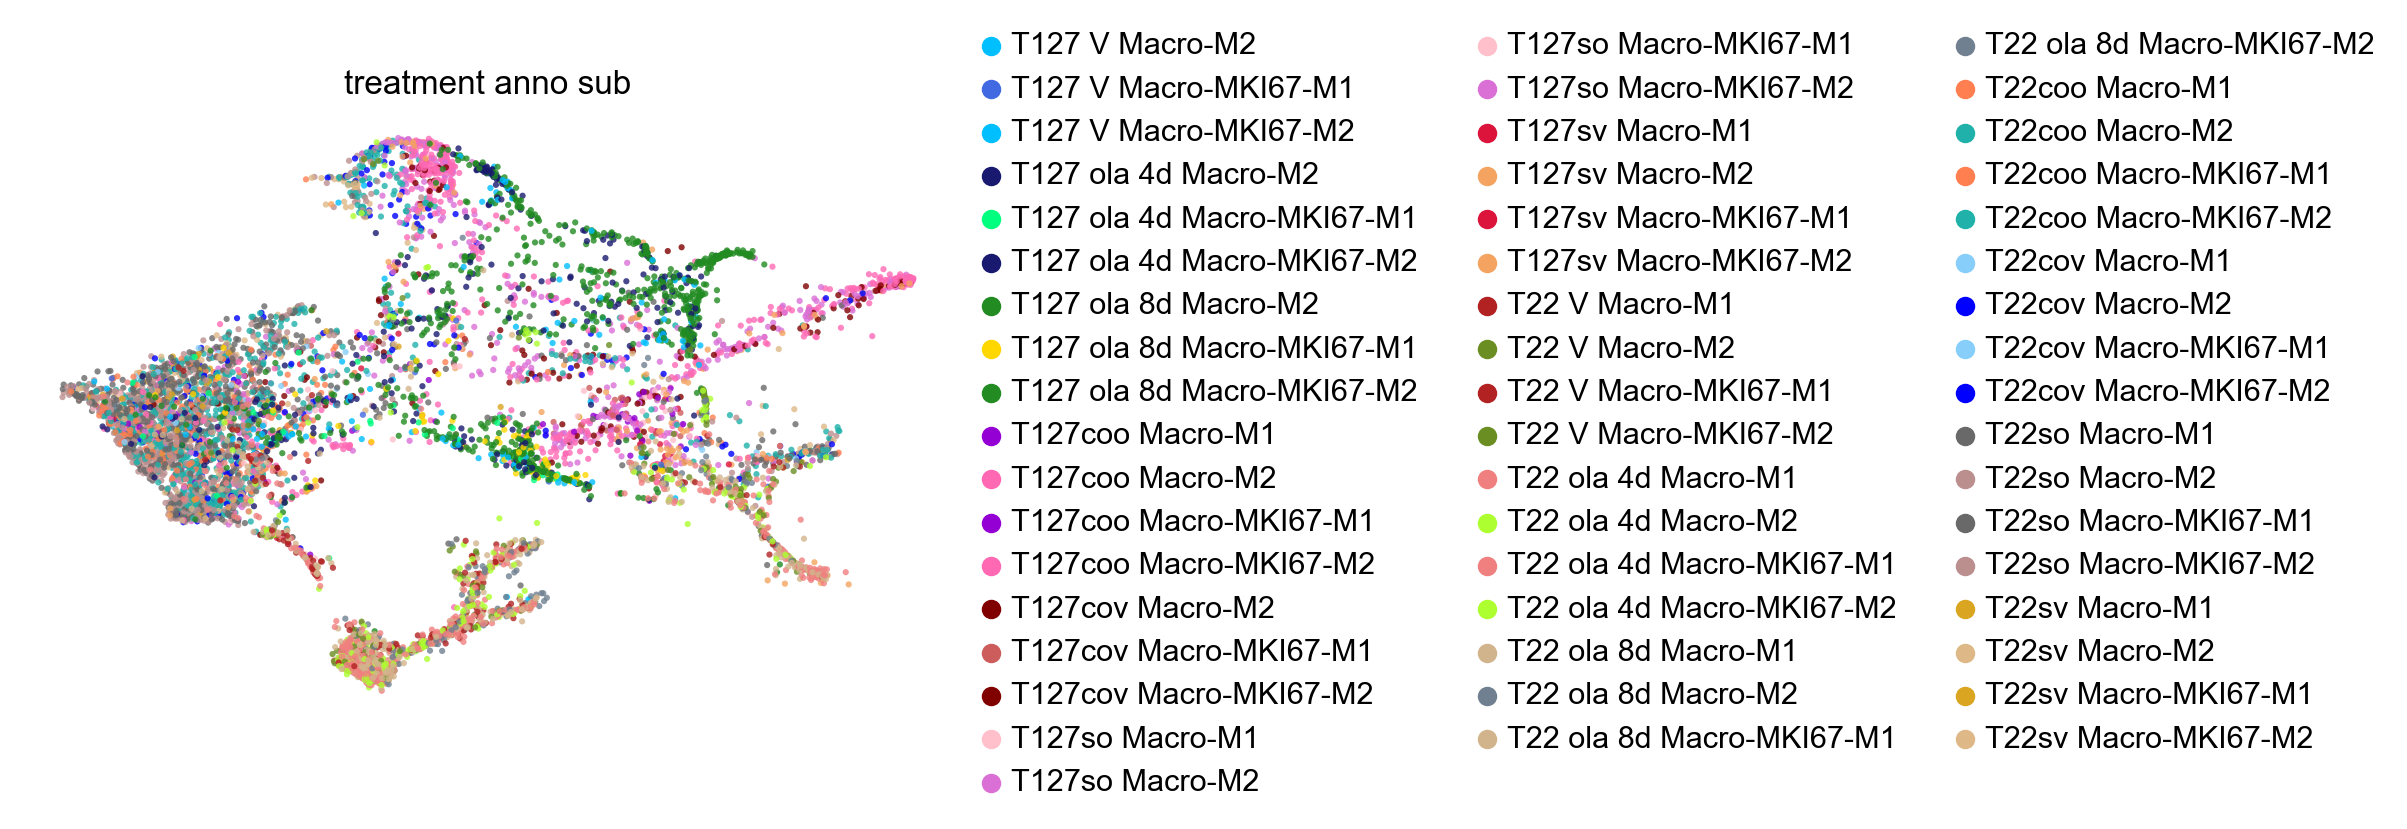

In [533]:
#plot umap grouped by treatment
plot_pattern="treatment_anno_sub"
scv.pl.scatter(adata, save=f"{plot_pattern}_densmap.pdf",
               basis="densmap",
           color=plot_pattern,legend_loc="right",
          palette=[  "DeepSkyBlue","royalblue","DeepSkyBlue","MidnightBlue","SpringGreen","MidnightBlue",
                  "forestgreen","gold","forestgreen","darkviolet","hotpink","darkviolet","hotpink",
                    "maroon","IndianRed","maroon","Pink","orchid","Pink","orchid","crimson","Sandybrown","crimson","Sandybrown",
                   "firebrick","olivedrab","firebrick","olivedrab","lightcoral","greenyellow","lightcoral","greenyellow",
                   "tan","slategrey","tan","slategrey","coral","lightseagreen","coral","lightseagreen",
            "lightskyblue","blue","lightskyblue","blue","dimgrey","RosyBrown","dimgrey","RosyBrown","Goldenrod","BurlyWood","Goldenrod","BurlyWood","Peru",
            "indigo","Thistle","black"],
            size=20, alpha=0.8,
            )

saving figure to file pool_M1_M2_MKI67_figures/scvelo_Sample_umap.pdf


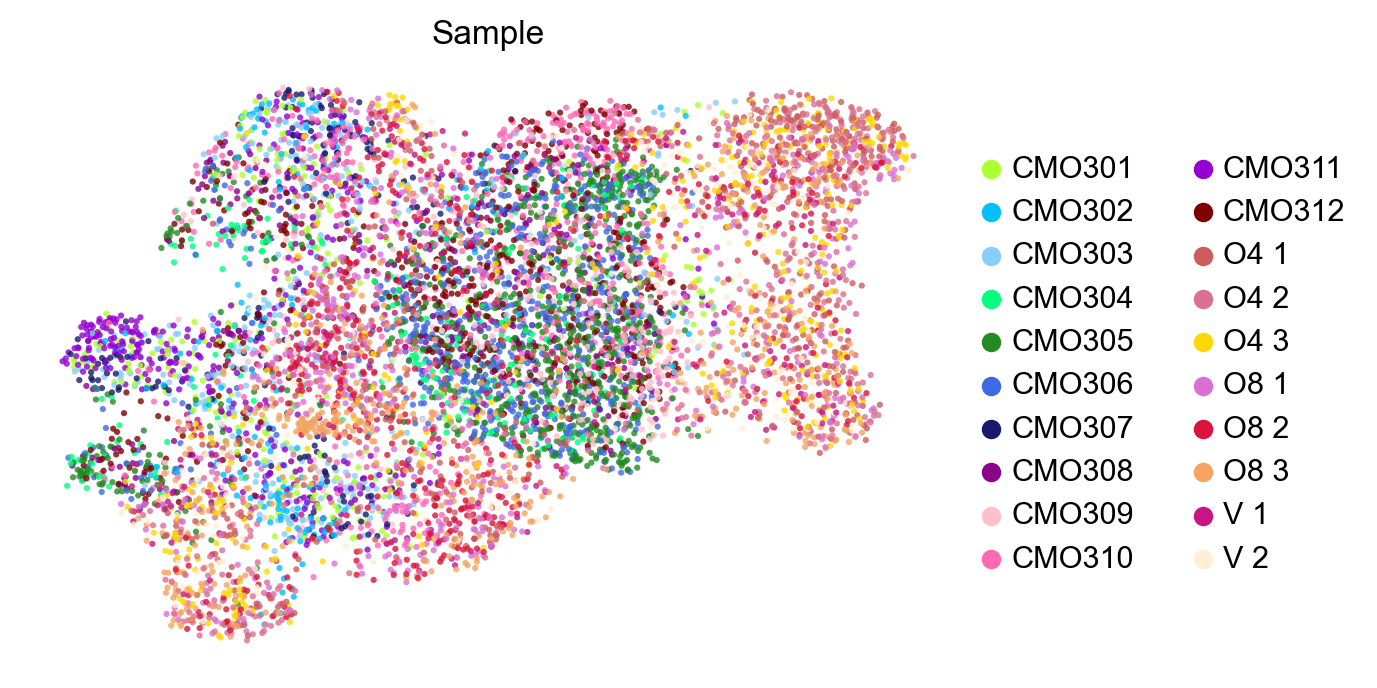

In [920]:
#plot umap grouped by treatment
plot_pattern="Sample"
scv.pl.scatter(adata, save=f"{plot_pattern}_umap.pdf",
               basis="umap",
           color=plot_pattern,legend_loc="right",
          palette=[  "greenyellow", "DeepSkyBlue","lightskyblue","SpringGreen","forestgreen","royalblue","MidnightBlue","DarkMagenta","Pink","hotpink","darkviolet",
                    "maroon","IndianRed","PaleVioletRed",
            "gold","orchid","crimson","Sandybrown","mediumvioletred", "PapayaWhip","PeachPuff",
            "firebrick","olivedrab","lightcoral",
            "tan","slategrey","coral","lightseagreen","Aqua","CadetBlue","PaleTurquoise",
            "lightsteelblue","dimgrey","RosyBrown","Goldenrod","BurlyWood","Peru",
            "indigo","Thistle","black"],
            size=20, alpha=0.8,
            )

saving figure to file pool_M1_M2_MKI67_figures/scvelo_Sample_umap.pdf


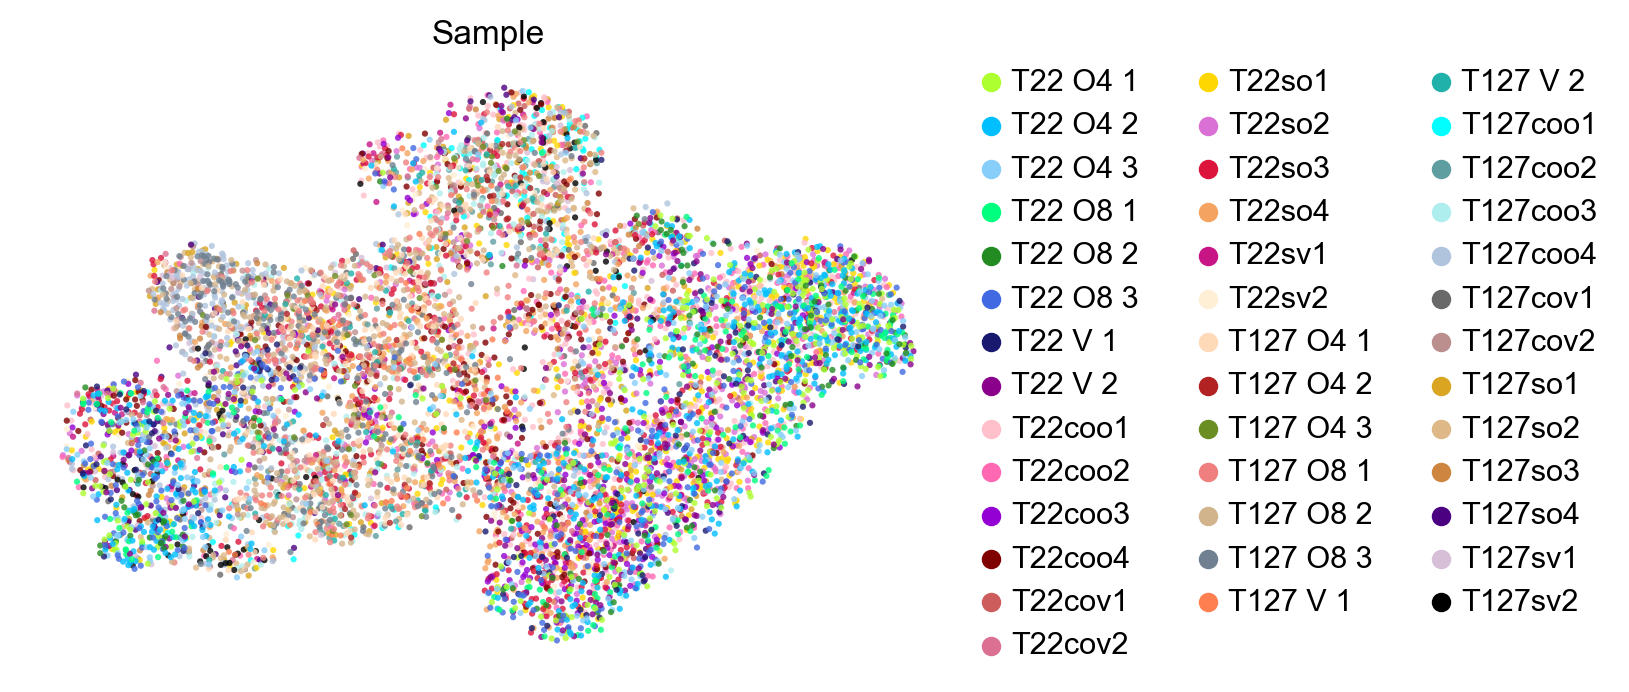

In [921]:
#plot umap grouped by treatment
plot_pattern="Sample"
scv.pl.scatter(adata_, save=f"{plot_pattern}_umap.pdf",
               basis="umap",
           color=plot_pattern,legend_loc="right",
          palette=[  "greenyellow", "DeepSkyBlue","lightskyblue","SpringGreen","forestgreen","royalblue","MidnightBlue","DarkMagenta","Pink","hotpink","darkviolet",
                    "maroon","IndianRed","PaleVioletRed",
            "gold","orchid","crimson","Sandybrown","mediumvioletred", "PapayaWhip","PeachPuff",
            "firebrick","olivedrab","lightcoral",
            "tan","slategrey","coral","lightseagreen","Aqua","CadetBlue","PaleTurquoise",
            "lightsteelblue","dimgrey","RosyBrown","Goldenrod","BurlyWood","Peru",
            "indigo","Thistle","black"],
            size=20, alpha=0.8,
            )

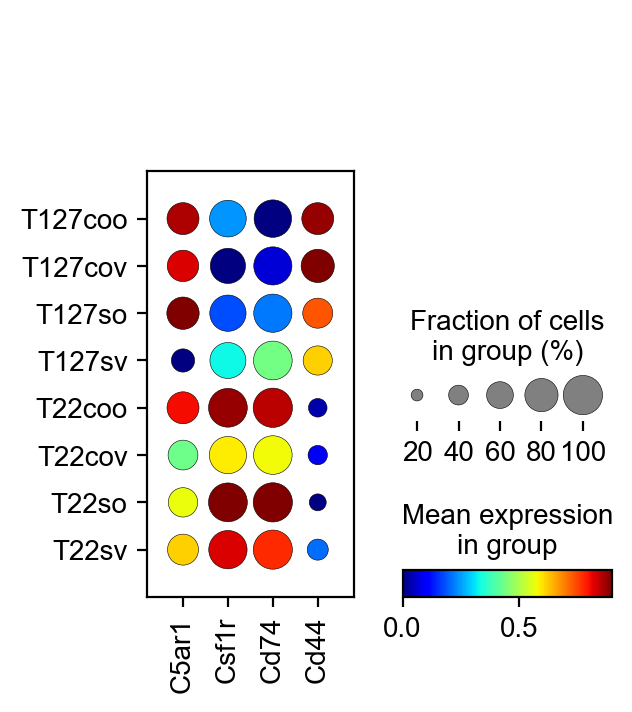

In [380]:
sc.pl.violin(adata, 
              ["C5ar1","Csf1r","Cd74","Cd44"], groupby='treatment',cmap="jet",vmax=0.9,#layer="spliced",
              standard_scale="var", save=f"Macro_receptors_M2.pdf" )

# TRAJECTORY

In [765]:
adata = sc.read(f'{project_ID}_figures/{project_ID}_anno.h5ad')

In [873]:
#calculate velocity with stochastic mode first
scv.tl.velocity(adata,  mode='stochastic',use_latent_time=False)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:02:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file pool_M1_M2_MKI67_figures/scvelo_pseudotime.pdf


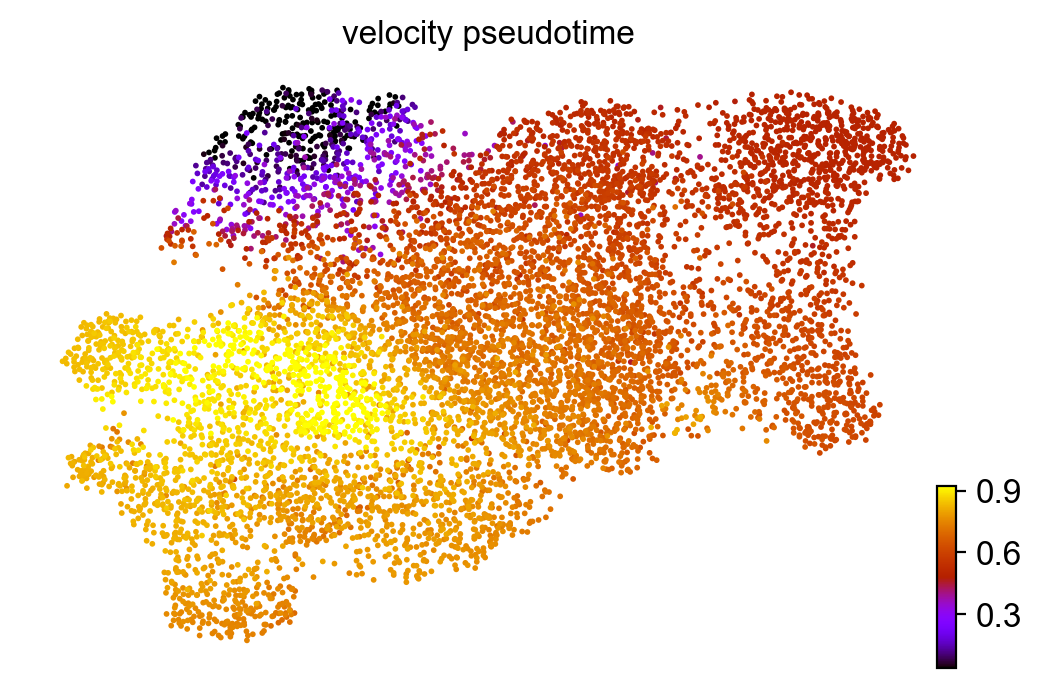

In [874]:
#calculate and plot out pseudotime
#scv.tl.terminal_states(adata, self_transitions=False)
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot', perc=(2,98), save="pseudotime.pdf",basis="umap")

In [875]:
#we have to calculate velocity first before we recover dynamics 
scv.tl.recover_dynamics(adata ,plot_results=False, 
                        fit_connected_states=True, use_raw=False, n_jobs=20,
                        fit_scaling=True)

recovering dynamics (using 20/32 cores)


  0%|          | 0/1886 [00:00<?, ?gene/s]

    finished (0:08:29) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [876]:
#calculate velocity one more time with dynamical mode
scv.tl.velocity(adata,  mode='dynamical',use_latent_time=True)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:14) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:01:25) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file pool_M1_M2_MKI67_figures/scvelo_pseudotime.pdf


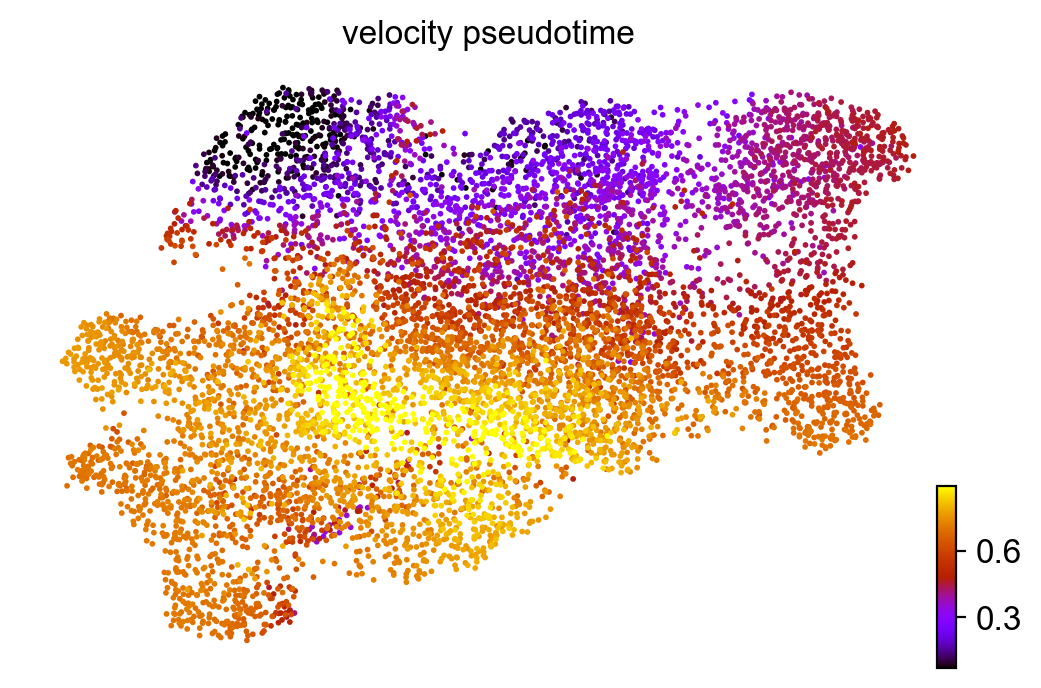

In [877]:
#calculate and plot out dynamical pseudotime
#scv.tl.terminal_states(adata, self_transitions=False)
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot', perc=(2,98), save="pseudotime.pdf",basis="umap")

computing latent time using root_cells, end_points as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file pool_M1_M2_MKI67_figures/scvelo_latent_time_tmp.pdf


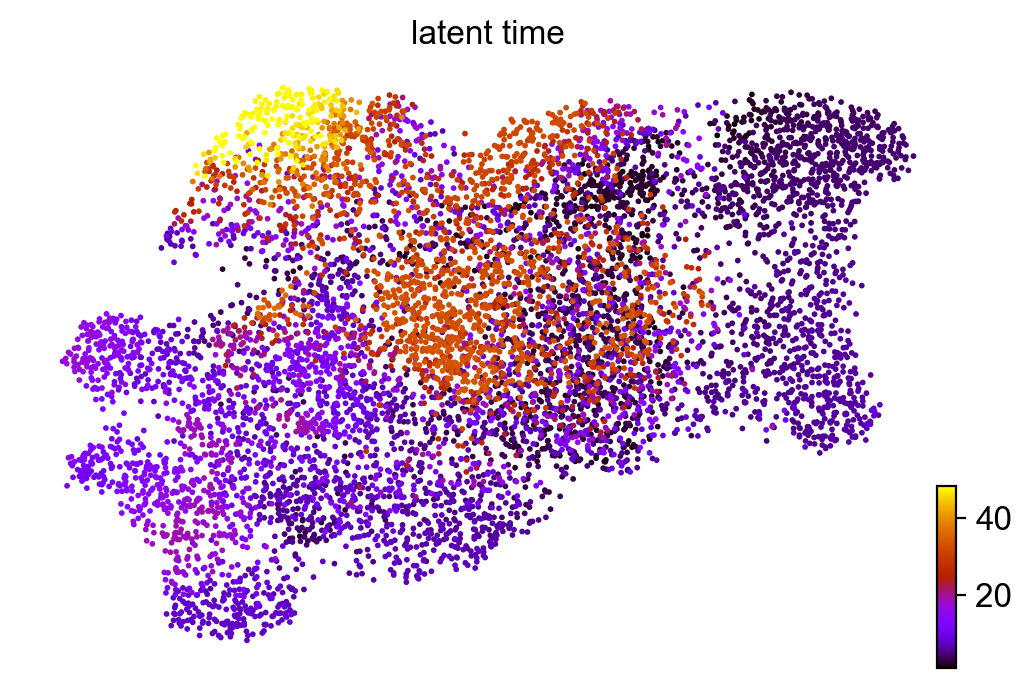

In [968]:
#sometimes we have to do latent-time if the inter population transition is not remarkable, you can refer to their oringinal paper for better understanging of the differences between pseudotime and latent-time
scv.tl.latent_time(adata, vkey='velocity', min_likelihood=0.56, min_confidence=0.56,
                  min_corr_diffusion=0.6, weight_diffusion=False, root_key="root_cells",
                   end_key="end_points", t_max=50, copy=False)
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot', perc=(1,99),smooth=5, save="latent_time_tmp.pdf",basis="umap")

In [711]:
#summarize the arrows of each cluster into 1 single big arrow
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata,use_time_prior="latent_time", root_key="root_cells", end_key="end_points" #when we only do velocity pseudotime trajectory we set the use_time_prior="velociyt_pseudotime", when we do latent time trajectory we have to chage the prior time into latent time
           ,groups="anno_clusters_sub",
            threshold_root_end_prior=0.95,
           #,groups='velocity_clusters'
           )
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

running PAGA using priors: ['latent_time', 'root_cells', 'end_points']
    finished (0:00:03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [ ]:
#we can set the color of the big dot into Sample_Cluster so that we will get a pie chart of the percentage of each treatment inside 1 cluster
scv.pl.paga(adata, basis='umap', size=20, alpha=0.7,
            min_edge_width=1.5, node_size_scale=1
            ,save="transition_densmap_anno.svg"
            #,color="velocity_clusters"
            ,color="anno_clusters"
            ,threshold=0.1,minimum_spanning_tree=False,
           )

In [ ]:
#plot velocity and expression plots of each gene in the gene list
scv.pl.velocity(adata,asymm, ncols=2,
                #save="gene_seleted_merge.pdf", 
                basis="umap", color="clusters", figsize=(7,6)
               )

In [ ]:
adata.write(f'{project_ID}_figures/{project_ID}_anno_dy.h5ad')

## correlation heatmap

In [850]:
adata=adata[adata.obs.anno_clusters!="Macro-MKI67"]

In [851]:
raw=pd.DataFrame(data=adata.raw.X.copy(),index=adata.obs_names, columns=adata.raw.var_names)

In [262]:
score_list=["latent_time","Regulon(Nfkb1(+))","Regulon(Mef2c(+))","Regulon(Irf8(+))","Regulon(Mef2a(+))","Regulon(Bcl11a(+))",
                      "Regulon(Bhlhe40(+))","Regulon(E2f7(+))","Regulon(Ezh2(+))",
                      "Regulon(Klf2(+))","Regulon(Maf(+))","Regulon(Spic(+))","Regulon(Tcf4(+))","protumor_cytokine_score",
            "reactome_phagocytosis_score","KEGG_phagocytosis_score","MM_GO_antigen_presentation_score","antitumor_cytokine_score",]
gene_list=["Cd209a","Csf1r","Il12b","Cd86","Itgax","Cd74","Cd44","Mcl1","Mrc1","Msr1","Il10","Siglec1","Ccl8","C5ar1",]

In [621]:
group="Sample_anno"

In [549]:
import math

In [550]:
corr_list=np.array([])
for i in score_list:
    for k in score_list:
        x_label=i
        score_x = pd.DataFrame(adata.obs[x_label].values,columns=["score"],index=adata.obs[group])
        score_x = score_x.groupby(level=0).mean()
        
        y_label=k
        score_y = pd.DataFrame(adata.obs[y_label].values,columns=["score"],index=adata.obs[group])
        score_y = score_y.groupby(level=0).mean()
        
        x=score_x["score"].values
        y=score_y["score"]
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,r)
index=np.array([])
for i in score_list:
    for k in score_list:
        index=np.append(index, i+"-"+k)
corr=pd.Series(corr_list, index=index)

In [551]:
corr_list=np.array([])
for i in score_list:
    for k in gene_list:
        x_label=i
        score_x = pd.DataFrame(adata.obs[x_label].values,columns=["score"],index=adata.obs[group])
        score_x = score_x.groupby(level=0).mean()
        
        y_label=k
        gene_y = raw.loc[:,[y_label]]
        gene_y.index=adata.obs[group]
        gene_y =gene_y.groupby(level=0).mean()
        
        x=score_x["score"].values
        y=gene_y.loc[:,y_label].values
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,r)
index=np.array([])
for i in score_list:
    for k in gene_list:
        index=np.append(index, i+"-"+k)
corr2=pd.Series(corr_list, index=index)

In [552]:
corr_list=np.array([])
for i in gene_list:
    for k in gene_list:
        x_label=i
        gene_x = raw.loc[:,[x_label]]
        gene_x.index=adata.obs[group]
        gene_x =gene_x.groupby(level=0).mean()
        
        y_label=k
        gene_y = raw.loc[:,[y_label]]
        gene_y.index=adata.obs[group]
        gene_y =gene_y.groupby(level=0).mean()
        
        x=gene_x.loc[:,x_label].values
        y=gene_y.loc[:,y_label].values
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,r)
index=np.array([])
for i in gene_list:
    for k in gene_list:
        index=np.append(index, i+"-"+k)
corr3=pd.Series(corr_list, index=index)

In [553]:
corr_list=np.array([])
for i in gene_list:
    for k in score_list:
        x_label=i
        gene_x = raw.loc[:,[x_label]]
        gene_x.index=adata.obs[group]
        gene_x =gene_x.groupby(level=0).mean()
        
        y_label=k
        score_y = pd.DataFrame(adata.obs[y_label].values,columns=["score"],index=adata.obs[group])
        score_y = score_y.groupby(level=0).mean()
        
        x=gene_x.loc[:,x_label].values
        y=score_y["score"]
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,r)
index=np.array([])
for i in gene_list:
    for k in score_list:
        index=np.append(index, i+"-"+k)
corr4=pd.Series(corr_list, index=index)

In [554]:
corr_list=np.array([])
for i in score_list:
    for k in score_list:
        x_label=i
        score_x = pd.DataFrame(adata.obs[x_label].values,columns=["score"],index=adata.obs[group])
        score_x = score_x.groupby(level=0).mean()
        
        y_label=k
        score_y = pd.DataFrame(adata.obs[y_label].values,columns=["score"],index=adata.obs[group])
        score_y = score_y.groupby(level=0).mean()
        
        x=score_x["score"].values
        y=score_y["score"]
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,math.log10(p+math.exp(-7)))
index=np.array([])
for i in score_list:
    for k in score_list:
        index=np.append(index, i+"-"+k)
pvalues=pd.Series(corr_list, index=index)

In [555]:
corr_list=np.array([])
for i in score_list:
    for k in gene_list:
        x_label=i
        score_x = pd.DataFrame(adata.obs[x_label].values,columns=["score"],index=adata.obs[group])
        score_x = score_x.groupby(level=0).mean()
        
        y_label=k
        gene_y = raw.loc[:,[y_label]]
        gene_y.index=adata.obs[group]
        gene_y =gene_y.groupby(level=0).mean()
        
        x=score_x["score"].values
        y=gene_y.loc[:,y_label].values
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,math.log10(p+math.exp(-7)))
index=np.array([])
for i in score_list:
    for k in gene_list:
        index=np.append(index, i+"-"+k)
pvalues2=pd.Series(corr_list, index=index)

In [556]:
corr_list=np.array([])
for i in gene_list:
    for k in gene_list:
        x_label=i
        gene_x = raw.loc[:,[x_label]]
        gene_x.index=adata.obs[group]
        gene_x =gene_x.groupby(level=0).mean()
        
        y_label=k
        gene_y = raw.loc[:,[y_label]]
        gene_y.index=adata.obs[group]
        gene_y =gene_y.groupby(level=0).mean()
        
        x=gene_x.loc[:,x_label].values
        y=gene_y.loc[:,y_label].values
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,math.log10(p+math.exp(-7)))
index=np.array([])
for i in gene_list:
    for k in gene_list:
        index=np.append(index, i+"-"+k)
pvalues3=pd.Series(corr_list, index=index)

In [557]:
corr_list=np.array([])
for i in gene_list:
    for k in score_list:
        x_label=i
        gene_x = raw.loc[:,[x_label]]
        gene_x.index=adata.obs[group]
        gene_x =gene_x.groupby(level=0).mean()
        
        y_label=k
        score_y = pd.DataFrame(adata.obs[y_label].values,columns=["score"],index=adata.obs[group])
        score_y = score_y.groupby(level=0).mean()
        
        x=gene_x.loc[:,x_label].values
        y=score_y["score"]
        r,p = stats.pearsonr(x, y) 
        
        corr_list=np.append(corr_list,math.log10(p+math.exp(-7)))
index=np.array([])
for i in gene_list:
    for k in score_list:
        index=np.append(index, i+"-"+k)
pvalues4=pd.Series(corr_list, index=index)

In [558]:
corr_total=pd.concat([corr, corr2,corr3,corr4])
corr_total=pd.DataFrame(corr_total, columns=["R"])
X=np.array([])
Y=np.array([])
for i in range(0,len(corr_total)):
    X=np.append(X, corr_total.index[i].split("-")[0])
    Y=np.append(Y, corr_total.index[i].split("-")[1])
corr_total.loc[:,"X"]=X
corr_total.loc[:,"Y"]=Y
corr_total.loc[:,"pvalues"]=pd.concat([pvalues, pvalues2,pvalues3,pvalues4])

In [559]:
star=np.array([])
for i in range(0,len(corr_total)):
    if ((corr_total.loc[:,"pvalues"][i]<-1.3) & (abs(corr_total.loc[:,"R"][i])>0.3)):
        star=np.append(star, 60)
    else:
        star=np.append(star,0)
corr_total.loc[:,"star"]=star

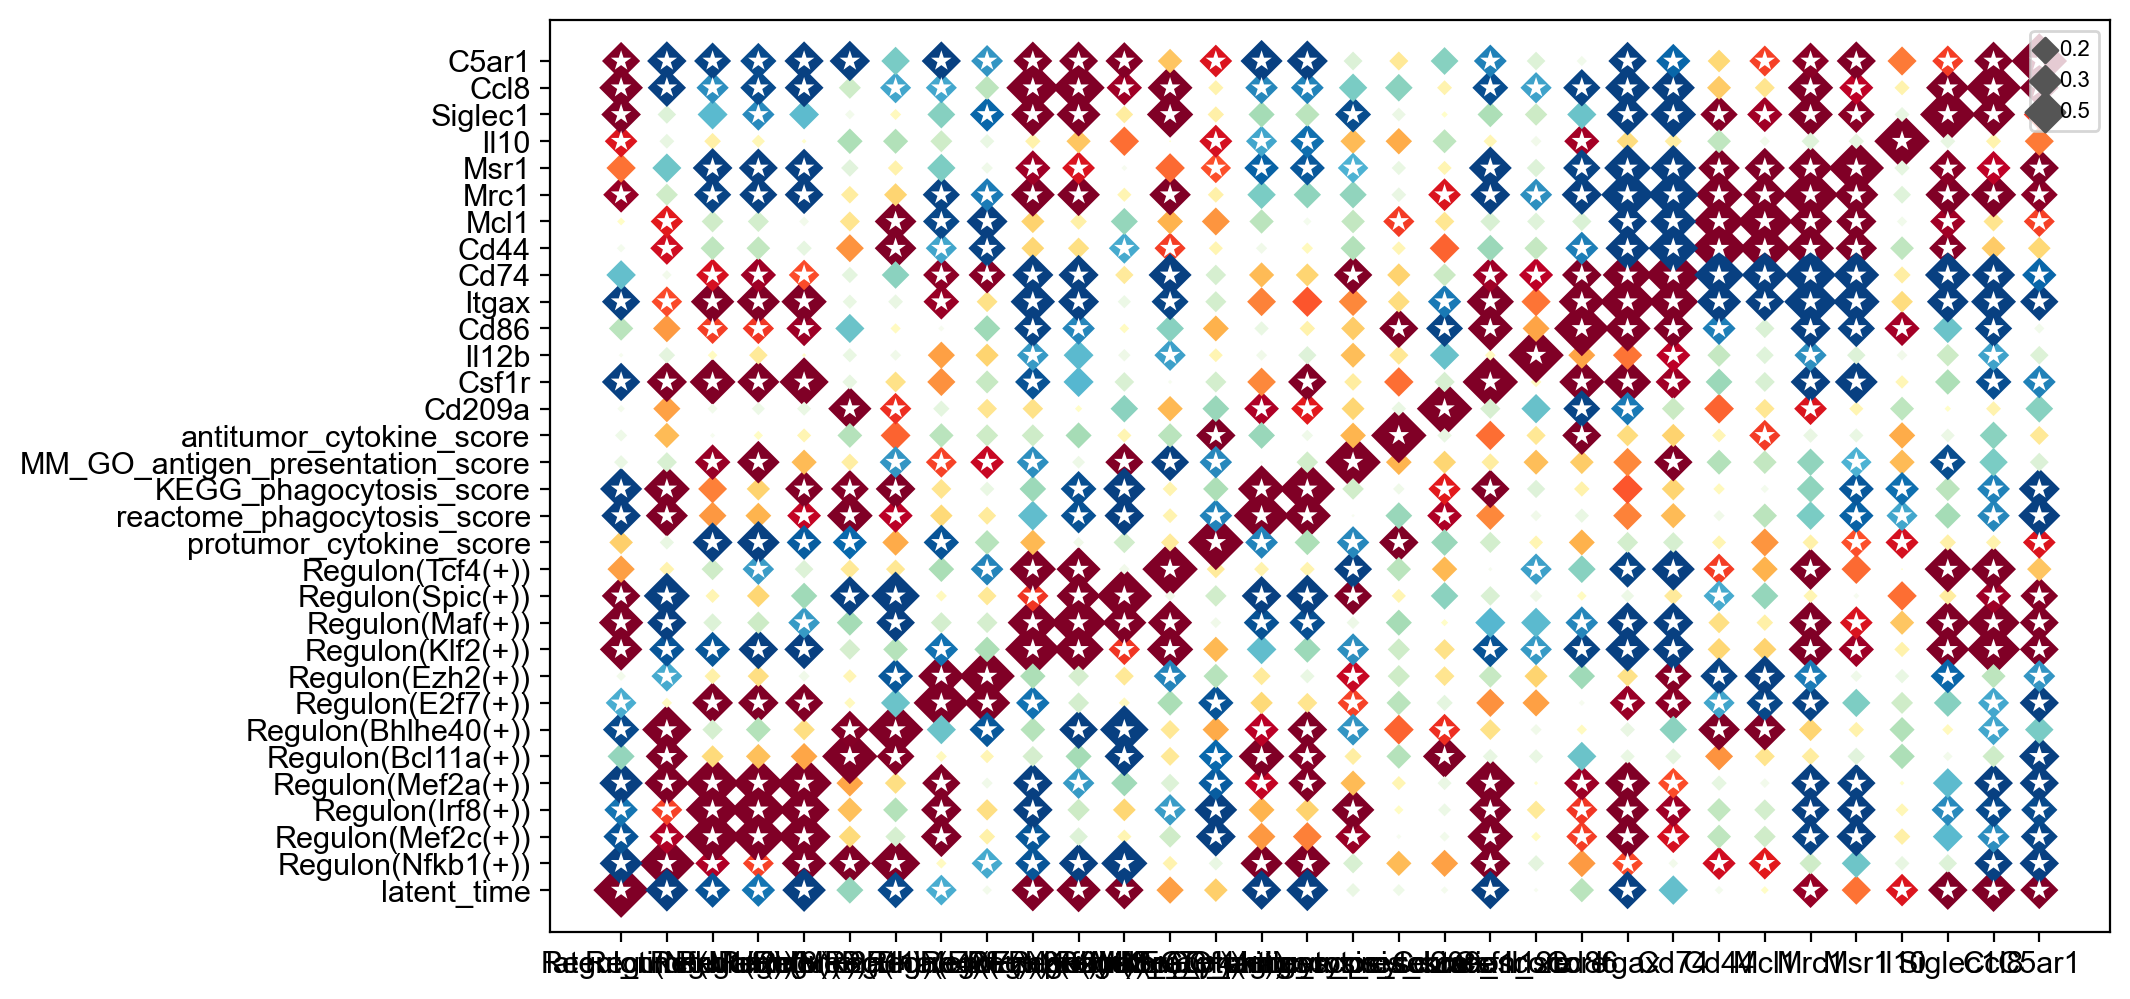

In [560]:
plt.figure(figsize = (10,6))  #set figure size

#fig, (ax) = plt.subplots(1, 1, figsize=(2,3), dpi=100)
 

plt.scatter(corr_total.loc[:,"X"], corr_total.loc[:,"Y"], c=-corr_total.loc[:,"pvalues"],
            s=corr_total.loc[:,"R"]*200,alpha=1, linewidths=0, cmap="YlOrRd", marker="D") # plot scatters
plt.scatter(corr_total.loc[:,"X"], corr_total.loc[:,"Y"], c=-corr_total.loc[:,"pvalues"],
            s=-corr_total.loc[:,"R"]*200,alpha=1, linewidths=0, cmap="GnBu",marker="D")
plt.scatter(corr_total.loc[:,"X"], corr_total.loc[:,"Y"], c="white",s=corr_total.loc[:,"star"],alpha=1, linewidths=0, marker="*")# plot scatters

#map1 = ax.imshow(np.stack([corr_total.loc[:,"pvalues"],corr_total.loc[:,"pvalues"]]),cmap='YlOrRd')
#map2 = ax.imshow(np.stack([-corr_total.loc[:,"pvalues"],-corr_total.loc[:,"pvalues"]]),cmap='GnBu')
#plt.yticks(np.arange(0.5,41.5,1), y)
#plt.xticks(np.arange(0.5,41.5,1), x)
#plt.grid()
#plt.colorbar(map2)

s4 = plt.scatter([],[], s=40, marker='D', color='#555555')
s6 = plt.scatter([],[], s=60, marker='D', color='#555555')
s10 = plt.scatter([],[], s=100, marker='D', color='#555555')
plt.legend((s4,s6,s10),
       ('0.2', '0.3', '0.5'),
       scatterpoints=1,
       loc='best',
       ncol=1,
       fontsize=8)
#make the file that we will store these plots in 
try:
    directoryName=project_ID+"_DEG"
    os.mkdir(directoryName)
except:
    pass

plt.savefig(f"{project_ID}_DEG/pearson_panel_total_Sample5.pdf",dpi=300)
plt.show()  # show plots

In [ ]:
#export meta data for R packages
meta_sample_clusters=pd.concat([adata.obs.anno_clusters,adata.obs.Sample, adata.obs.treatment,adata.obs.term, adata.obs.strain],axis=1)
meta_sample_clusters.to_csv(f"{project_ID}_DEG/meta_reconcat.csv")

## correlation

In [852]:
# or we can build a correlation between two clusters after grouping the feature level by clusters
y_label="Hdac9"
gene_y = raw.loc[:,[y_label]]
gene_y.index=adata.obs[group]
gene_y =gene_y.groupby(level=0).mean()
#gene_y=gene_y[gene_y>0].dropna()

In [791]:
# or we can build a correlation between two clusters after grouping the feature level by clusters
x_label="latent_time"
score_x = pd.DataFrame(adata.obs[x_label].values,columns=["score"],index=adata.obs[group])
score_x = score_x.groupby(level=0).mean()

In [629]:
# or we can build a correlation between two clusters after grouping the feature level by clusters
y_label="Regulon(Mef2c(+))"
score_y = pd.DataFrame(adata.obs[y_label].values,columns=["score"],index=adata.obs[group])
score_y = score_y.groupby(level=0).mean()


In [853]:
# or we can build a correlation between two clusters after grouping the feature level by clusters
x_label="C5ar1"
gene_x = raw.loc[:,[x_label]]
gene_x.index=adata.obs[group]
gene_x =gene_x.groupby(level=0).mean()
#gene_x=gene_x[gene_x>0].dropna()

In [867]:
x=gene_x[gene_y.values>0].loc[:,x_label].values
y=gene_y[gene_y.values>0].values#.loc[:,y_label].values

#x=score_x["score"].values
#y=score_y["score"].values
z=f"{x_label}_{y_label}"


In [868]:
color=np.array([])
for i in gene_x.index:
    if i.endswith("Macro-M2"):
        color=np.append(color, "blue")
    elif i.endswith("Macro-M1"):
        color=np.append(color, "pink")
    elif i.endswith("MKI67-M1"):
        color=np.append(color, "purple")
    elif i.endswith("MKI67-M2"):
        color=np.append(color, "black")

In [819]:
color=np.array([])
for i in gene_x.index:
    color=np.append(color,scv.utils.interpret_colorkey(adata[adata.obs[group]==i], c="Sample_anno_sub")[0])

In [869]:
import math

size=np.array([])
for i in gene_x.index:
    size=np.append(size, 7*(math.log2(len(adata[adata.obs[group]==i]))))
   # print(i,(len(adata_[adata_.obs.Sample_anno_sub==i])))

In [ ]:
plt.figure(figsize = (6,6))  #set figure size
fig = plt.figure() 
ax1 = fig.add_subplot(231) 
ax1.set_title(z, fontdict={"size":8} ) 
 
r,p = stats.pearsonr(x, y) 

ax1.scatter(x, y, c="b",s=50,alpha=0.7, linewidths=0) # plot scatters

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1),y) 
a, b = regr.coef_, regr.intercept_
ax1.plot(x,  regr.predict(x.reshape(-1,1)), color='red', linewidth=1)


plt.xlabel(x_label, fontdict={"size":8})
plt.ylabel(y_label, fontdict={"size":8}) 

ax2 = fig.add_subplot(233)
ax2.text(0.1, 0.25, r'r = %6.3f, p = %6.3f'%(r,p), fontdict={"size":8})
#ax2.text(0.1, 0.5,r'a = %6.3f, b = %6.3f'%(a,b), fontdict={"size":8})
plt.grid()  # show grids


#make the file that we will store these plots in 
try:
    directoryName=project_ID+"_DEG"
    os.mkdir(directoryName)
except:
    pass

plt.savefig(f"{project_ID}_DEG/pearson_{z}_color1_exclu0.pdf",dpi=300)
plt.show()  # show plots

In [290]:
adata.write(f"{project_ID}_figures/{project_ID}_anno_dy_reg.h5ad")